<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Software Engineering For Data Science  
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

# Notebook 5: Data Processing & Cleaning for Data Science: Data Ingestion and Wrangling with Pandas

The purpose of this [Jupyter Notebook] is to getting you introduced to the Data Processing & Cleaning for Data
Science: Data Ingestion and Wrangling with Pandas. It provides a set of practical Training challenges that allow grasping the different concepts presented in the lecture 5.

## Challenge 1
1. Connect to the `chinook.db` sqlite3 database available in the folder data.
2. Find the genre names with the longest average song length.

`Hint:`
join the tables with the genre name and song length and use the SQLite aggregate
function for the average along with a GROUP BY clause.


In [1]:
# sqlite3 data/chinook.db
# SELECT 
#     g.Name AS GenreName,
#     AVG(t.Milliseconds) / 1000.0 AS AvgSongLengthInSeconds
# FROM 
#     genres g
# JOIN 
#     tracks t ON g.GenreId = t.GenreId
# GROUP BY 
#     g.Name
# ORDER BY 
#     AvgSongLengthInSeconds DESC
# LIMIT 1;

## Challenge 2: Ingesting, Wrangling and Analyzing  iTune data

You've started a new data science position at the iTune department at Apple Company. 
The department wants to build, test, and evaluate new machine learning recommendation song models using a different source of data: in Excel file, in a csv file, and in the chinook.db SQLite database. They want you proceed with the data ingsestion and data wrangling procedures to provide a clean dataset to be used later for their machine learning based recommendation songs models.  

1. They particlarly asked you to load, clean, and analyze, and then deliver your results to the executive team and president.
You should deliver a small summary of your EDA work from pandas and save your cleaned and prepared data as a new Excel file. The data files are `chinook_data.xlsx`, `chinook_data.csv`, and `chinook.db` on the data folder existed within this notebook.

`Hint:`
1. Follow the procedures in Lecture 5 - Slides: 13-17 - For data ingestion (Data loading from different sources).

2. Follow and test the procedures in Lecture 5 - Slides:18-22 - For Basic Exploratory Data Analysis (EDA).

3. Follow and test the procedures in Lecture 5 - Slides:23-27 - For Basic Data Cleaning Operations.

4. To save your cleaned dataset in an excel file use the pandas built-in method: `pandas.DataFrame.to_excel`.


In [2]:
import pandas as pd
import sqlite3

# Load data from Excel file
df_excel = pd.read_excel('data/chinook_data.xlsx')

# Load data from CSV file
df_csv = pd.read_csv('data/chinook_data.csv')

# Load data from SQLite database
conn = sqlite3.connect('data/chinook.db')
df_sql = pd.read_sql_query("SELECT * FROM tracks", conn)  # Example query
conn.close()


In [3]:
# Concatenate the DataFrame
itunes_df = pd.concat([df_csv, df_excel, df_sql])


print("First 5 rows of the concatenated DataFrame:\n", itunes_df.head(), "\n")

print("Last 5 rows of the concatenated DataFrame:\n", itunes_df.tail(), "\n")


print(f"Shape of the DataFrame (rows, columns): {itunes_df.shape}\n")


print("Summary of the DataFrame (info):\n")
itunes_df.info()
itunes_df['Genre'].mode()
print("\nMissing values in each column:\n", itunes_df.isna().sum())


First 5 rows of the concatenated DataFrame:
                                     Track                           Composer  \
0  All the Best Cowboys Have Daddy Issues                                NaN   
1                               Beira Mar                       Gilberto Gil   
2                                  Brasil  Milton Nascimento, Fernando Brant   
3                            Ben Franklin                                NaN   
4            O Último Romântico (Ao Vivo)                                NaN   

   Milliseconds      Bytes  UnitPrice     Genre  \
0       2555492  211743651       1.99  TV Shows   
1        295444    9597994       0.99     Latin   
2        155428    5252560       0.99     Latin   
3       1271938  264168080       1.99    Comedy   
4        231993    7692697       0.99     Latin   

                                             Album             Artist  \
0                                   Lost, Season 1               Lost   
1                    

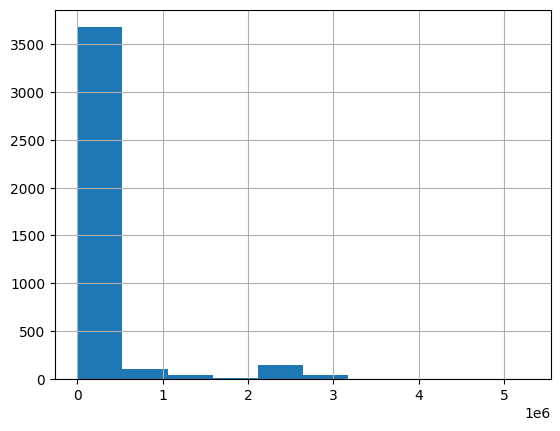

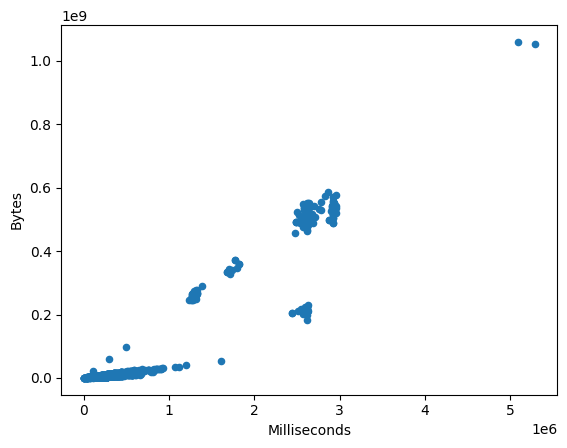

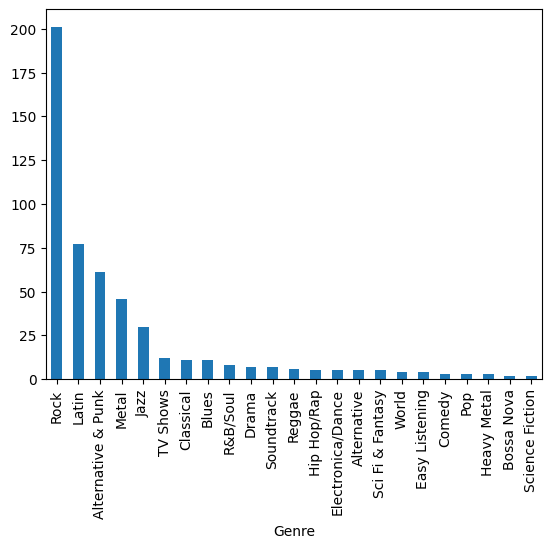

In [4]:
import matplotlib.pyplot as plt
itunes_df['Milliseconds'].hist()
plt.show()
itunes_df.plot.scatter(x='Milliseconds', 
y='Bytes')
plt.show()
itunes_df['Genre'].value_counts().plot.bar()
plt.show()


In [5]:
#Basic Data Cleaning Operations :
#Removing irrelevant data :
# itunes_df.drop('Composer', axis=1, inplace=True)

print(itunes_df.columns)
only_music = itunes_df[~itunes_df['Genre'].isin(['Drama', 'TV Shows', 'SciFi & Fantasy', 'Science Fiction', 'Comedy'])]
print(only_music)
# itunes_df.dropna(inplace=True)
itunes_df['Composer'].fillna('Unknown', inplace=True)
# Drop the missing values :
itunes_df.dropna(inplace=True)
# itunes_df.dropna(thresh = 2, inplace=True)

Index(['Track', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice', 'Genre',
       'Album', 'Artist', 'TrackId', 'Name', 'AlbumId', 'MediaTypeId',
       'GenreId'],
      dtype='object')
                             Track                           Composer  \
1                        Beira Mar                       Gilberto Gil   
2                           Brasil  Milton Nascimento, Fernando Brant   
4     O Último Romântico (Ao Vivo)                                NaN   
5                Freewheel Burning                                NaN   
6                   That's The Way                       Robert Plant   
...                            ...                                ...   
3498                           NaN                               None   
3499                           NaN                     Franz Schubert   
3500                           NaN                 Claudio Monteverdi   
3501                           NaN            Wolfgang Amadeus Mozart   
3502      

C:\Users\User\AppData\Local\Temp\ipykernel_3604\2508880786.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  itunes_df['Composer'].fillna('Unknown', inplace=True)


In [6]:
# Save the cleaned dataset to a new Excel file
itunes_df.to_excel('data/cleaned_chinook_data.xlsx', index=False)

## Challenge 3: Ingesting, Wrangling and Analyzing Bitcoin price data


You have just joined a financial company as a new data scientist. The company is  interested in the Bitcon market and you are working with a team that aims to ingest data and then clean, and analyse the final dataset to be used later to build and evaluate machine learning models for Bitcon Price forecasting.

The company is working with two datasets coming from two different sources and is only interested in the `BTCUSD` currency: 
1. One dataset is json file locally existed in the data folder: `bitcoin_price.json`. This file contains data up to `2020-11-27`
2. The other uses a real time data flow that comes from yahoo finance api service. The company wants to collect real time data beginning from `2020-11-28` to `2022-10-31`.

You are asked to do the required checklist procedures and operations to load, clean, and analyse, and then deliver your results to the executive team with providing a short summaray of your prelimanary EDA work from pandas and save the cleaner dataset as a new csv file. 
Note that the 

`Hint:`

1. To load a json file into a dataframe use the snipet code below:

```python
import json

with open('<path_to_your_json_file>') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)
```

This code uses the `json` built-in python module to open a json file and load it in an object data. Then we use the `from_dict()` pandas method to transform the json data into a DataFrame.

2. To get real time data flow from the yahoo finance api sevice we will use the `yfinance` module. 
    * So, first install the module in your environment using  `conda install yfinance`.
    * Then use the code below to get real data. Test with the periode from `2020-01-01` to `2024-10-31`.

```python
import yfinance as yf

btc_yf_df = yf.download('BTC-USD', # The currency we are intersted in
                   start='<start_date>', # The starting date
                   end='<end_date>', # The starting date
                   interval='1d' # The frequency of collecting the data. here 1 day
                  )
```

3. Get a look of the two DataFrames and see what are the common columns and what differ one to another.
    * You will notice that the  json DataFrame is indexed numericaly wherease the yahoo DataFrame is indexed by Date. So, you have to uniform the index for both DataFrames. In this case we will change the json DataFrame  index by Date.
        1. To do that, first rename the column `time` to `Date` by using the built-in pandas method: `rename()` as follows:
        
        ```python
        rename(columns ={'<old_col_name>':'<new_col_name>'}, inplace = True)
         ```
         
        2. What is the datatype of the new Date column in the json DataFrame?
            * You will notice that it is a `datetime64[ns]` datatype, which means the number of seconds since 1-1-1970. To make it date fomat like the yahoo DataFrame, convert the column to a pandas datetime datatype by using the following code: 
         
          ```python
              btc_df['<column_name>'] = pd.to_datetime(btc_df['<column_name>'], unit='ms')
          ```
         
        3. To change the index of your dataframe use the `set_index` built-in pandas function:
        ```python
              set_index('<column_name>', inplace=True)
        ```
            * The remaining common columns labels in both DataFrames are not uniformed. The json DataFrame uses lowercase strings,  while the yahoo DataFrame uses a first letter world uppercase string.
                  1. Change the column labels of the yahoo DataFrame to lowercase strings. Adjust the following code accordingly:
             ```python
                data_frame.columns= data_frame.columns.str.lower()
             ```
             
4. Concatenate the two dataframe into one dataset.
5. Do The basic EDA cheklist procedures on the resulting dataset:
   * Do few time series plots: 
       * open, close, high, low, volume with regards to Date
   * Print the correlation matrix.
6. Do the General Data Cleaning Checklist operations to see if ther is still cleaning operations to accomplish.
    * Most particularly, you will notice a NaN values in both `adj close` and `symbole` columns. What is your suggestion to deal with this missing values given that the company is not interest at all on the `adj close` data. 	
7. Save your cleaner dataframe into a csv file.
    * Use the `pandas.DataFrame.to_csv` method.
             

In [7]:
import json
import pandas as pd
import yfinance as yf
with open('data/bitcoin_price.json') as f:
    data = json.load(f)

btc_df_jsn=pd.DataFrame.from_dict(data)


# Download BTC-USD data from Yahoo Finance
btc_yf_df = yf.download('BTC-USD', 
                        start='2020-01-01', 
                        end='2024-10-31', 
                        interval='1d')

print(btc_df_jsn)
print(btc_yf_df)


[*********************100%***********************]  1 of 1 completed

      symbol           time          open         close         high  \
0     btcusd  1364688000000     92.500000     93.033000     93.74999   
1     btcusd  1364774400000     93.250000    103.999000    105.90000   
2     btcusd  1364860800000    104.000000    118.229354    118.38670   
3     btcusd  1364947200000    117.958261    134.700000    146.88000   
4     btcusd  1365033600000    134.716560    132.899000    143.00000   
...      ...            ...           ...           ...          ...   
2788  btcusd  1606176000000  18364.000000  19131.000000  19400.00000   
2789  btcusd  1606262400000  19133.654712  18727.000000  19497.00000   
2790  btcusd  1606348800000  18726.475677  17211.695801  18908.00000   
2791  btcusd  1606435200000  17213.000000  17171.000000  17531.00000   
2792  btcusd  1606521600000  17171.000000  17686.840768  17705.00000   

              low        volume  
0        91.00000   3083.079791  
1        92.49999   5224.401313  
2        99.00000   8376.527478  

In [8]:
btc_df_jsn.rename(columns ={'time':'Date'}, inplace = True)
btc_df_jsn['Date'] = pd.to_datetime(btc_df_jsn['Date'], unit='ms')

btc_df_jsn.set_index('Date', inplace=True)
btc_yf_df.columns = [col[0].lower() for col in btc_yf_df.columns]
btc_yf_df.rename(columns={'adj close': 'symbol'}, inplace=True)
btc_yf_df['symbol'] = 'btcusd'

btc_yf_df.head()

,symbol,close,high,low,open,volume
Date,,,,,,
2020-01-01 00:00:00+00:00,btcusd,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02 00:00:00+00:00,btcusd,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03 00:00:00+00:00,btcusd,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04 00:00:00+00:00,btcusd,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05 00:00:00+00:00,btcusd,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [12]:

btc_df = pd.concat([btc_df_jsn, btc_yf_df])
print(btc_df.head())
print(btc_df.info())

                     symbol        open       close       high        low  \
Date                                                                        
2013-03-31 00:00:00  btcusd   92.500000   93.033000   93.74999   91.00000   
2013-04-01 00:00:00  btcusd   93.250000  103.999000  105.90000   92.49999   
2013-04-02 00:00:00  btcusd  104.000000  118.229354  118.38670   99.00000   
2013-04-03 00:00:00  btcusd  117.958261  134.700000  146.88000  101.51088   
2013-04-04 00:00:00  btcusd  134.716560  132.899000  143.00000  119.00000   

                           volume  
Date                               
2013-03-31 00:00:00   3083.079791  
2013-04-01 00:00:00   5224.401313  
2013-04-02 00:00:00   8376.527478  
2013-04-03 00:00:00  12996.245072  
2013-04-04 00:00:00   6981.668305  
<class 'pandas.core.frame.DataFrame'>
Index: 4558 entries, 2013-03-31 00:00:00 to 2024-10-30 00:00:00+00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  --

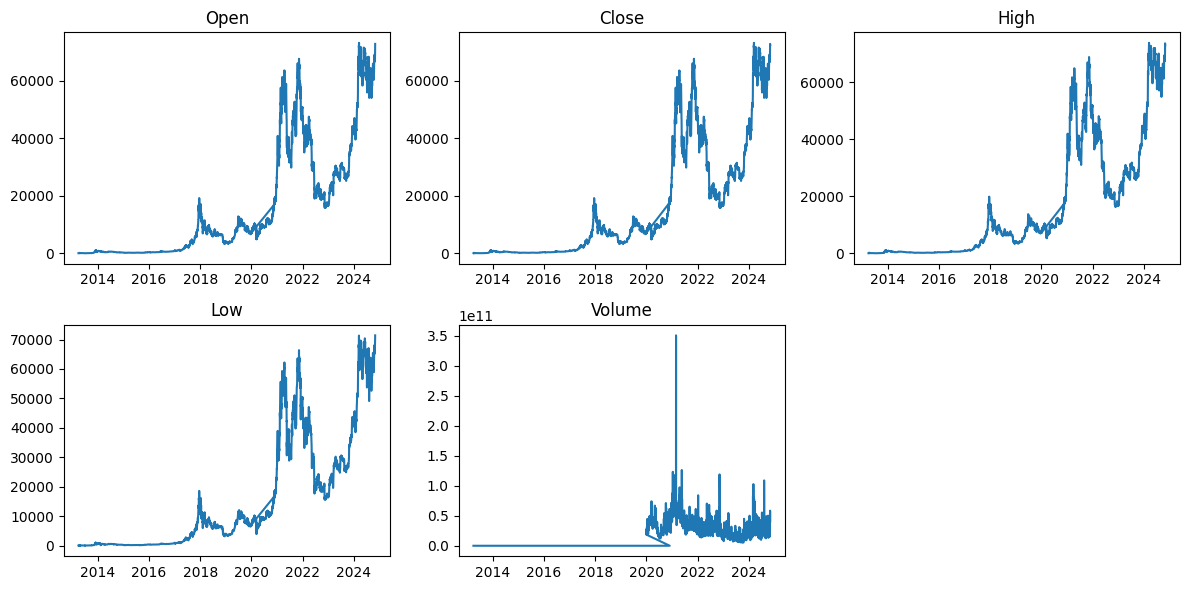

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.plot(btc_df['open'])
plt.title('Open')

plt.subplot(2, 3, 2)
plt.plot(btc_df['close'])
plt.title('Close')

plt.subplot(2, 3, 3)
plt.plot(btc_df['high'])
plt.title('High')

plt.subplot(2, 3, 4)
plt.plot(btc_df['low'])
plt.title('Low')

plt.subplot(2, 3, 5)
plt.plot(btc_df['volume'])
plt.title('Volume')

plt.tight_layout()
plt.show()

In [17]:
btc_df[['open', 'close', 'high', 'low', 'volume']].corr()

,open,close,high,low,volume
open,1.000000,0.999102,0.999596,0.999340,0.691171
close,0.999102,1.000000,0.999612,0.999521,0.689995
high,0.999596,0.999612,1.000000,0.999208,0.695562
low,0.999340,0.999521,0.999208,1.000000,0.682923
volume,0.691171,0.689995,0.695562,0.682923,1.000000


In [18]:
btc_df.isna().sum()

symbol    0
open      0
close     0
high      0
low       0
volume    0
dtype: int64

In [19]:
btc_df.to_csv('btc_data.csv', index=True)